<a target="_blank" href="https://colab.research.google.com/github/D4san/MultiREx-public/blob/main/examples/multirex-quickstart.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## External dependencies

If you are workin in Google Colab use this to install dependencies. When installing `multirex`, `taurex3` is automatically installed.

In [2]:
import sys 
if 'google.colab' in sys.modules:
    !pip install -Uq multirex

In [1]:
import multirex as mrex
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# This is for developing purposes
%load_ext autoreload 
%autoreload 2

## Creating a single system

In [2]:
# Radii and masses are in solar units
star=mrex.Star(temperature=5777,radius=1,mass=1,phoenix_path="")

# For planets we assume earth units (earth mass and radius)
planet=mrex.Planet(radius=1,mass=1)

# Atmospher
atmo=mrex.Atmosphere(
    temperature=288, # in K
    base_pressure=1e5, # in Pa
    top_pressure=1, # in Pa
    fill_gas="N2", # the gas that fills the atmosphere
    composition=dict(
        CO2=-4, # This is the log10(mix-ratio)
    )
)
planet.set_atmosphere(atmo)

# sma is semimajar axis in AU as used in TauREx 
system=mrex.System(star=star,planet=planet,sma=1)

The directory to Phoenix already exists in the specified path:  current directory


**create a list of gasses**

In [3]:
mrex.Util.list_gases()
mrex.Util.get_gases()
mrex.Util.get_stellar_phoenix()

Available gases in the database:
['O3', 'CO2', 'O2', 'CH4', 'H2O']
The directory to the opacity database already exists in the specified path:  current directory
The directory to Phoenix already exists in the specified path:  current directory


'Phoenix'

In [4]:
mrex.Util.list_gases()

Available gases in the database:
['N2', 'NO2', 'O3', 'CH3Cl', 'CO', 'HCN', 'CO2', 'DMS', 'CH4', 'H2O', 'C2H6', 'O2']


Let's create the transmission model:

In [5]:
system.make_tm()

For example we can visualize the spectrum of the planet. But first we must define a range of wavenumbers, we can use the `wavenumber_grid` function to do this.

In [6]:
# wl in microns
wn=mrex.wavenumber_grid(wl_min=0.3,wl_max=30,resolution=1000)
wn[:10]

array([333.33333333, 334.87347378, 336.42073033, 337.97513585,
       339.53672339, 341.10552611, 342.68157736, 344.26491064,
       345.85555958, 347.45355799])

In [7]:
fig, ax = system.plot_spectrum(wn_grid=wn)

You can manipulate your figure:

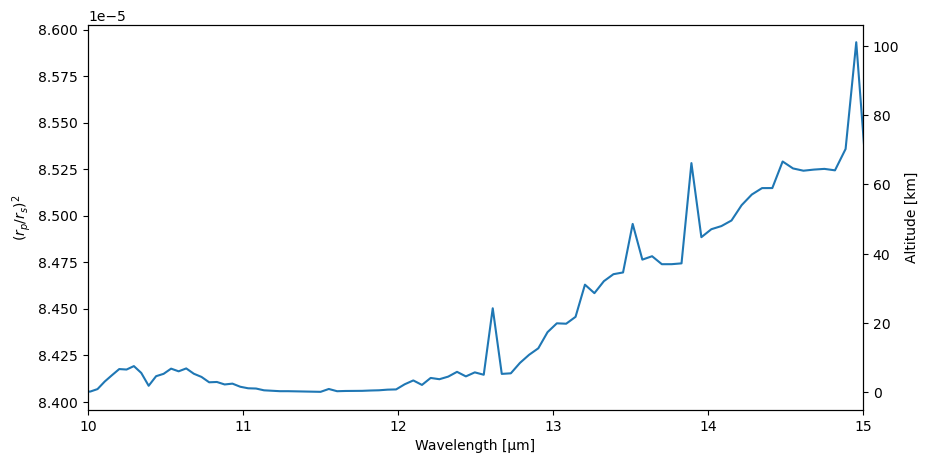

In [8]:
ax.set_xlim(10,15)
fig

Now we can show contibutions:

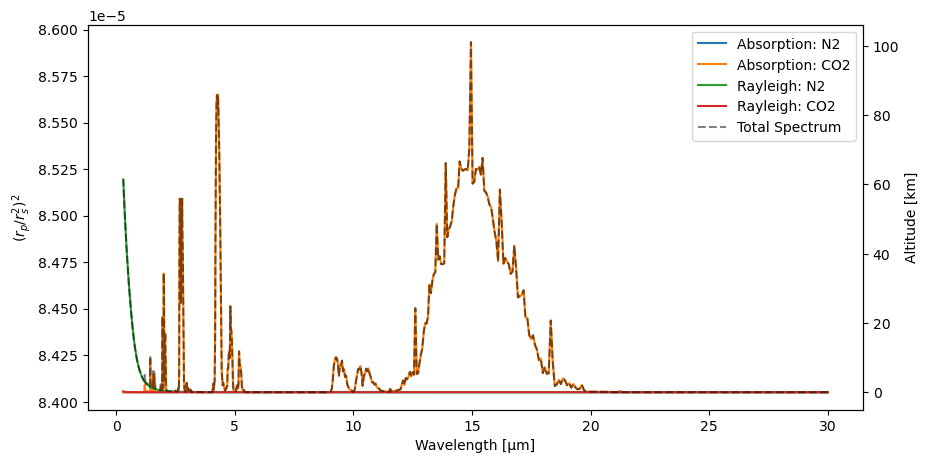

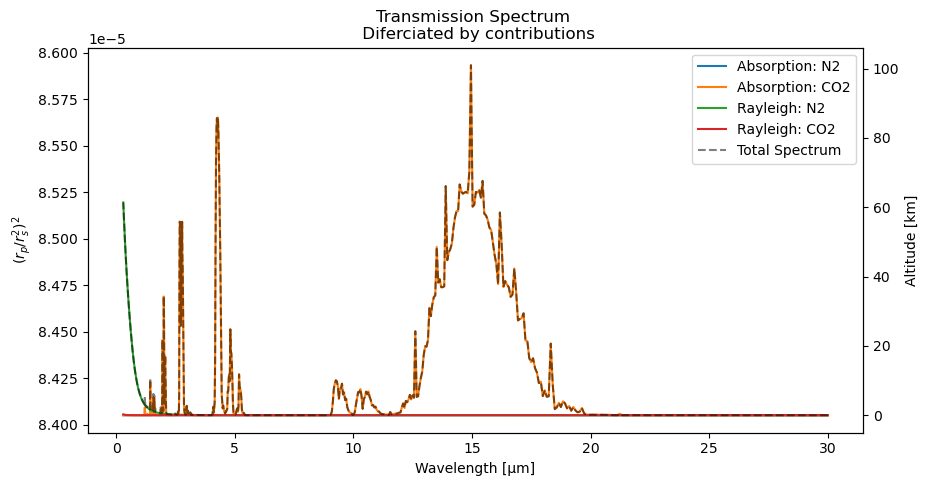

In [9]:
fig, ax = system.plot_contributions(wn_grid=wn, showfig=True, showspectrum=True) ## Add option showfig = False, plot_contributions(..., showspectrum=True)
ax.set_title("Transmission Spectrum \n Diferciated by contributions")
fig

In [10]:
data= system.explore_multiverse(
    wn_grid=wn,
    snr=10,
    n_universes=10, # n_universes : Number of universes. One planet per universe with properties drawn from the priors 
    labels="O3",
    n_observations=1000, # Number of observations per universe
    header=True, # Add header to the observations
    )

Exploring universes: 100%|██████████| 10/10 [00:20<00:00,  2.07s/it]


Generating observations for 10 spectra...


In [11]:
data.keys()

dict_keys(['spectra', 'observations'])

In [12]:
data["spectra"].describe()

,sma,seed,p radius,p mass,p seed,atm temperature,atm base_pressure,atm top_pressure,atm seed,atm CO2,...,0.31270820219292045,0.31127000362355567,0.3098384195756855,0.30841341962799274,0.30699497349907345,0.3055830510467927,0.3041776222676445,0.30277865729611425,0.3013861264040437,0.29999999999999993
count,10.0,1.000000e+00,10.0,10.0,1.000000e+00,10.0,10.0,10.0,1.000000e+00,10.0,...,10.000000,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,10.000000,10.000000
mean,1.0,1.710823e+09,1.0,1.0,1.710823e+09,288.0,100000.0,1.0,1.710823e+09,-4.0,...,0.000085,8.515855e-05,8.516314e-05,8.516773e-05,8.517233e-05,8.517693e-05,8.518153e-05,8.518614e-05,0.000085,0.000085
std,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,...,0.000000,1.428562e-20,1.428562e-20,1.428562e-20,1.428562e-20,1.428562e-20,1.428562e-20,1.428562e-20,0.000000,0.000000
min,1.0,1.710823e+09,1.0,1.0,1.710823e+09,288.0,100000.0,1.0,1.710823e+09,-4.0,...,0.000085,8.515855e-05,8.516314e-05,8.516773e-05,8.517233e-05,8.517693e-05,8.518153e-05,8.518614e-05,0.000085,0.000085
25%,1.0,1.710823e+09,1.0,1.0,1.710823e+09,288.0,100000.0,1.0,1.710823e+09,-4.0,...,0.000085,8.515855e-05,8.516314e-05,8.516773e-05,8.517233e-05,8.517693e-05,8.518153e-05,8.518614e-05,0.000085,0.000085
50%,1.0,1.710823e+09,1.0,1.0,1.710823e+09,288.0,100000.0,1.0,1.710823e+09,-4.0,...,0.000085,8.515855e-05,8.516314e-05,8.516773e-05,8.517233e-05,8.517693e-05,8.518153e-05,8.518614e-05,0.000085,0.000085
75%,1.0,1.710823e+09,1.0,1.0,1.710823e+09,288.0,100000.0,1.0,1.710823e+09,-4.0,...,0.000085,8.515855e-05,8.516314e-05,8.516773e-05,8.517233e-05,8.517693e-05,8.518153e-05,8.518614e-05,0.000085,0.000085
max,1.0,1.710823e+09,1.0,1.0,1.710823e+09,288.0,100000.0,1.0,1.710823e+09,-4.0,...,0.000085,8.515855e-05,8.516314e-05,8.516773e-05,8.517233e-05,8.517693e-05,8.518153e-05,8.518614e-05,0.000085,0.000085


In [13]:
data["observations"].describe()

,SNR,29.999999999999996,29.862024862864565,29.72468429701139,29.58797538393846,29.451895218566502,29.31644090917717,29.181609577351622,29.04739835790937,28.913804398847354,...,0.31270820219292045,0.31127000362355567,0.3098384195756855,0.30841341962799274,0.30699497349907345,0.3055830510467927,0.3041776222676445,0.30277865729611425,0.3013861264040437,0.29999999999999993
count,10000.0,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,...,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,10.0,8.404920e-05,8.404902e-05,8.404836e-05,8.405134e-05,8.405015e-05,8.405215e-05,8.404856e-05,8.404949e-05,8.405047e-05,...,8.515118e-05,8.515723e-05,8.516168e-05,8.516800e-05,8.517350e-05,8.517765e-05,8.518148e-05,8.518431e-05,8.518785e-05,8.519212e-05
std,0.0,1.854711e-07,1.857669e-07,1.897122e-07,1.897928e-07,1.876624e-07,1.863384e-07,1.879424e-07,1.896096e-07,1.875826e-07,...,1.876927e-07,1.857890e-07,1.871412e-07,1.877641e-07,1.863867e-07,1.871214e-07,1.875983e-07,1.877524e-07,1.888197e-07,1.872222e-07
min,10.0,8.334059e-05,8.336839e-05,8.331956e-05,8.337941e-05,8.335885e-05,8.341816e-05,8.335977e-05,8.333453e-05,8.337112e-05,...,8.441265e-05,8.438099e-05,8.432668e-05,8.449724e-05,8.447889e-05,8.438625e-05,8.450591e-05,8.444577e-05,8.446532e-05,8.453726e-05
25%,10.0,8.392534e-05,8.392204e-05,8.392015e-05,8.392423e-05,8.392358e-05,8.392621e-05,8.391894e-05,8.391980e-05,8.392442e-05,...,8.502254e-05,8.503134e-05,8.503215e-05,8.503957e-05,8.504744e-05,8.505100e-05,8.505325e-05,8.505574e-05,8.506118e-05,8.506623e-05
50%,10.0,8.404936e-05,8.405062e-05,8.404774e-05,8.404976e-05,8.405024e-05,8.405087e-05,8.405004e-05,8.404856e-05,8.405038e-05,...,8.515178e-05,8.515699e-05,8.516017e-05,8.516980e-05,8.517343e-05,8.517824e-05,8.518198e-05,8.518241e-05,8.518569e-05,8.519262e-05
75%,10.0,8.417033e-05,8.417423e-05,8.417505e-05,8.417824e-05,8.417766e-05,8.417598e-05,8.417523e-05,8.417742e-05,8.417929e-05,...,8.527652e-05,8.528326e-05,8.528811e-05,8.529542e-05,8.529631e-05,8.530443e-05,8.530945e-05,8.531254e-05,8.531916e-05,8.531772e-05
max,10.0,8.484613e-05,8.489769e-05,8.475885e-05,8.480449e-05,8.479062e-05,8.474000e-05,8.478570e-05,8.483154e-05,8.475197e-05,...,8.582604e-05,8.587340e-05,8.588142e-05,8.585970e-05,8.594507e-05,8.593123e-05,8.591768e-05,8.586637e-05,8.594304e-05,8.587743e-05


## Creating a Multiverse

First we can create the components of a planetary system.

In [14]:
stars = mrex.Star(temperature=5777,radius=1,mass=1)
planets = mrex.Planet(radius=1,mass=1)
atmos=mrex.Atmosphere(
    temperature=288, # in K
    base_pressure=1e5, # in Pa
    top_pressure=1, # in Pa
    fill_gas="N2", # the gas that fills the atmosphere
    composition=dict(
        CO2=(-4,-1), # This is the range of log10(mix-ratio) of CO2
        H2O=(-4,-2),
        CH4=(-6,-3),
        O3=-6
    )
)
planets.set_atmosphere(atmos)
systems=mrex.System(star=stars,planet=planets,sma=1)
systems.make_tm()


Now we can initialize our model and use the other features of multirex.

Now we can generate a dataset spectra varying the parameters who we define as a range, and addionally we can add noise based on the signal to noise ratio to generate a set of observations.

Optionally we can add a label based on the presence of a molecule in the atmosphere.


In [15]:
wn=mrex.wavenumber_grid(wl_min=0.3,wl_max=30,resolution=1000)
data = systems.explore_multiverse(
    wn_grid=wn,
    snr=10,
    n_universes=10, # n_universes : Number of universes. One planet per universe with properties drawn from the priors 
    labels="O3",
    n_observations=1000, # Number of observations per universe
    header=True, # Add header to the observations
)
# This will produce 10 000 observations in total
"""
spectra=True,
observations=True, # Give me the observations
"""

Exploring universes: 100%|██████████| 10/10 [00:32<00:00,  3.23s/it]


Generating observations for 10 spectra...


'\nspectra=True,\nobservations=True, # Give me the observations\n'

In [16]:
data["spectra"]

,sma,seed,p radius,p mass,p seed,atm temperature,atm base_pressure,atm top_pressure,atm fill_gas,atm seed,...,0.31270820219292045,0.31127000362355567,0.3098384195756855,0.30841341962799274,0.30699497349907345,0.3055830510467927,0.3041776222676445,0.30277865729611425,0.3013861264040437,0.29999999999999993
0,1,1.710824e+09,1,1,1.710824e+09,288,100000.0,1,N2,1.710824e+09,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
1,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
2,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
3,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
4,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
5,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
6,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
7,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
8,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
9,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085


As you can see the planets are the same since you don't include variations in the properties of the planets.

In [17]:
data["observations"].describe()

,SNR,29.999999999999996,29.862024862864565,29.72468429701139,29.58797538393846,29.451895218566502,29.31644090917717,29.181609577351622,29.04739835790937,28.913804398847354,...,0.31270820219292045,0.31127000362355567,0.3098384195756855,0.30841341962799274,0.30699497349907345,0.3055830510467927,0.3041776222676445,0.30277865729611425,0.3013861264040437,0.29999999999999993
count,10000.0,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,...,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,10.0,8.496359e-05,8.541149e-05,8.506159e-05,8.498309e-05,8.500574e-05,8.521130e-05,8.512890e-05,8.495896e-05,8.499425e-05,...,8.515264e-05,8.515856e-05,8.516061e-05,8.516667e-05,8.517010e-05,8.517582e-05,8.518021e-05,8.518256e-05,8.519064e-05,8.519108e-05
std,0.0,2.398440e-07,2.422286e-07,2.414136e-07,2.438684e-07,2.409352e-07,2.400573e-07,2.411015e-07,2.420088e-07,2.367442e-07,...,2.233212e-07,2.195029e-07,2.201579e-07,2.205618e-07,2.195615e-07,2.209052e-07,2.171817e-07,2.231191e-07,2.237913e-07,2.204109e-07
min,10.0,8.394133e-05,8.447653e-05,8.410974e-05,8.416618e-05,8.415959e-05,8.428520e-05,8.426594e-05,8.376488e-05,8.406016e-05,...,8.430838e-05,8.435475e-05,8.431548e-05,8.422242e-05,8.437720e-05,8.434161e-05,8.431543e-05,8.438864e-05,8.409042e-05,8.430298e-05
25%,10.0,8.480463e-05,8.525010e-05,8.489534e-05,8.481650e-05,8.484230e-05,8.504736e-05,8.496417e-05,8.479476e-05,8.483504e-05,...,8.500263e-05,8.501093e-05,8.501467e-05,8.502072e-05,8.502075e-05,8.502323e-05,8.503414e-05,8.503629e-05,8.503976e-05,8.504177e-05
50%,10.0,8.496620e-05,8.541090e-05,8.505684e-05,8.498313e-05,8.500761e-05,8.521079e-05,8.512575e-05,8.495951e-05,8.499320e-05,...,8.515437e-05,8.515708e-05,8.516016e-05,8.516715e-05,8.516916e-05,8.517451e-05,8.517802e-05,8.518098e-05,8.518801e-05,8.519094e-05
75%,10.0,8.512147e-05,8.557318e-05,8.522472e-05,8.514846e-05,8.516807e-05,8.537346e-05,8.529253e-05,8.512155e-05,8.515668e-05,...,8.530206e-05,8.530446e-05,8.530660e-05,8.531354e-05,8.531873e-05,8.532865e-05,8.532586e-05,8.533119e-05,8.534120e-05,8.533982e-05
max,10.0,8.583721e-05,8.630216e-05,8.599455e-05,8.590419e-05,8.589485e-05,8.607160e-05,8.605305e-05,8.596215e-05,8.588876e-05,...,8.612168e-05,8.597366e-05,8.610450e-05,8.602151e-05,8.598045e-05,8.596735e-05,8.612284e-05,8.611844e-05,8.608416e-05,8.607299e-05


In [18]:
spectra,obs=data.values()

In [19]:
obs

,sma,seed,p radius,p mass,p seed,atm temperature,atm base_pressure,atm top_pressure,atm fill_gas,atm seed,...,0.31270820219292045,0.31127000362355567,0.3098384195756855,0.30841341962799274,0.30699497349907345,0.3055830510467927,0.3041776222676445,0.30277865729611425,0.3013861264040437,0.29999999999999993
0,1,1710823565.0,1,1,1710823565.0,288,100000.0,1,N2,1710823565.0,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
1,1,1710823565.0,1,1,1710823565.0,288,100000.0,1,N2,1710823565.0,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
2,1,1710823565.0,1,1,1710823565.0,288,100000.0,1,N2,1710823565.0,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000086,0.000085,0.000085,0.000085,0.000085
3,1,1710823565.0,1,1,1710823565.0,288,100000.0,1,N2,1710823565.0,...,0.000085,0.000086,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
4,1,1710823565.0,1,1,1710823565.0,288,100000.0,1,N2,1710823565.0,...,0.000085,0.000085,0.000086,0.000085,0.000085,0.000085,0.000085,0.000086,0.000085,0.000085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000086,0.000085
9996,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000086,0.000085,0.000085,0.000085
9997,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000086
9998,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085


In [20]:
obs["atm CO2"].value_counts()

-2.770529    1000
-2.219526    1000
-3.670289    1000
-3.094621    1000
-1.678432    1000
-3.521180    1000
-2.911148    1000
-3.368397    1000
-1.275513    1000
-2.673869    1000
Name: atm CO2, dtype: int64

Text(0.5, 1.0, 'Example of a Spectrum and its observation')

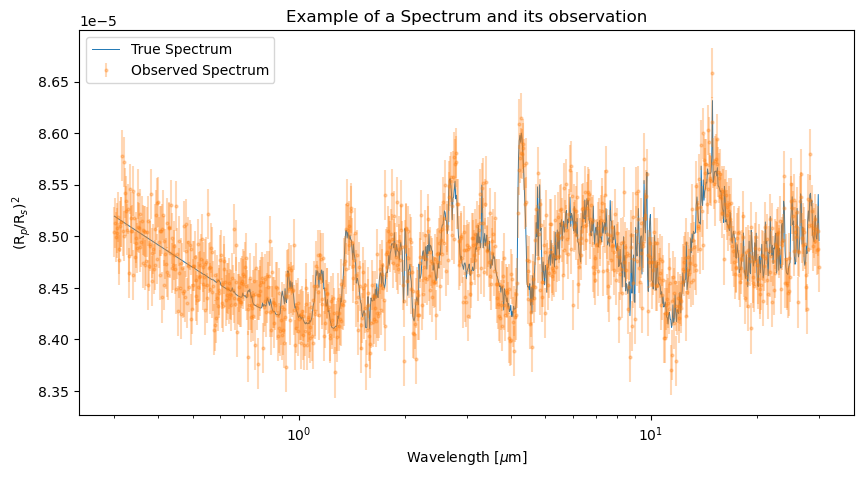

In [22]:
##
plt.figure(figsize=(10,5))
plt.plot(spectra.iloc[0,-1000:],label="True Spectrum",linewidth=0.7)
# obs.iloc[0,obs.channels], obs.channels = -1000:
# obs.spectra = obs.iloc[:,-1000:]	
plt.errorbar(x=1e4/wn,y=obs.iloc[0,-1000:],yerr=(max(obs.iloc[1,-1000:])-min(obs.iloc[1,-1000:]))/obs.loc[0,"SNR"]
             ,label="Observed Spectrum",fmt="o",markersize=2,alpha=0.3)
plt.xscale("log")
plt.legend()
plt.xlabel("Wavelength [$\mu$m]")
plt.ylabel("(R$_p$/R$_s$)$^2$")
plt.title("Example of a Spectrum and its observation")
